Epoch 1/15


C:\Hubert\Programy\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1735
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
Epoch 10/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 11/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108
Epoch 12/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
Epoch 13/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113
Epoch 14/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 15/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

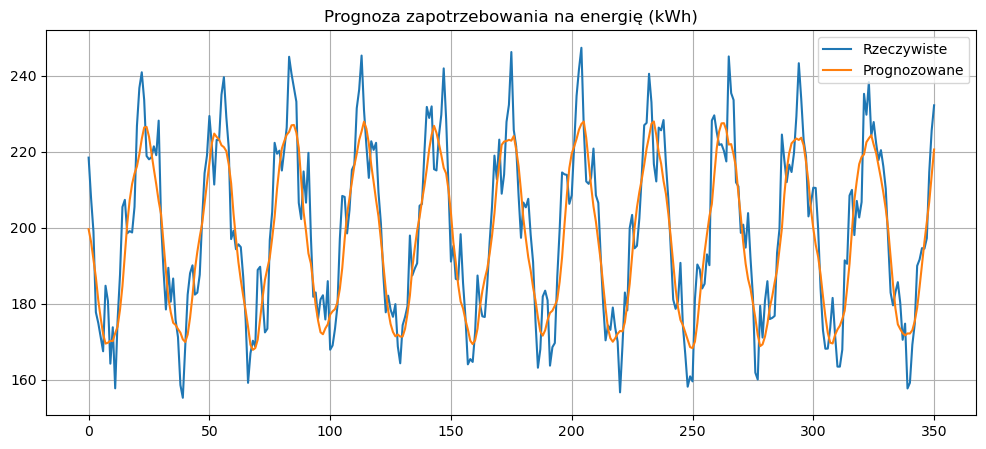

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Dane: zapotrzebowanie na energię (kWh)
np.random.seed(0)
days = 365
t = np.arange(days)
energy = 200 + 30*np.sin(2 * np.pi * t / 30) + 10*np.cos(2 * np.pi * t / 7) + np.random.normal(0, 5, days)
energy = energy.reshape(-1, 1)

# Normalizacja
scaler = MinMaxScaler()
energy_scaled = scaler.fit_transform(energy)

# Przygotowanie sekwencji
def create_sequences(data, look_back=14):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 14
X, y = create_sequences(energy_scaled, look_back)

# Model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=15, batch_size=8, verbose=1)

# Prognoza
predicted = model.predict(X)
predicted_inv = scaler.inverse_transform(predicted)
real_inv = scaler.inverse_transform(y)

# Wykres
plt.figure(figsize=(12,5))
plt.plot(real_inv, label='Rzeczywiste')
plt.plot(predicted_inv, label='Prognozowane')
plt.title("Prognoza zapotrzebowania na energię (kWh)")
plt.legend()
plt.grid()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Dane: normalne i anormalne zużycie prądu
def generate_power_data(n=1000, timesteps=10):
    X = np.random.normal(1.0, 0.1, (n, timesteps))  # normalny pobór
    y = np.zeros(n)
    anomalies = np.random.choice(n, n // 10, replace=False)
    X[anomalies] += np.random.normal(1.5, 0.5, (len(anomalies), timesteps))  # anomalie
    y[anomalies] = 1
    return X.reshape(n, timesteps, 1), y

X, y = generate_power_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Ocena
loss, acc = model.evaluate(X_test, y_test)
print(f"Dokładność wykrywania anomalii: {acc:.2f}")


Epoch 1/15


C:\Hubert\Programy\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9028 - loss: 0.5401 - val_accuracy: 0.8850 - val_loss: 0.4308
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.3812 - val_accuracy: 0.8850 - val_loss: 0.3200
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8967 - loss: 0.2715 - val_accuracy: 0.8850 - val_loss: 0.1895
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9169 - loss: 0.1293 - val_accuracy: 1.0000 - val_loss: 0.0606
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0084
Ep

In [13]:
from tensorflow.keras.utils import to_categorical

# Symulacja: 0 - lodówka, 1 - klimatyzacja, 2 - pralka
def generate_device_data(samples=1500, timesteps=30):
    X, y = [], []
    for label in range(3):
        for _ in range(samples // 3):
            if label == 0:
                seq = np.random.normal(0.5, 0.05, timesteps)  # lodówka - stałe zużycie
            elif label == 1:
                seq = np.sin(np.linspace(0, 2*np.pi, timesteps)) + np.random.normal(0, 0.1, timesteps)  # klima - cykle
            else:
                seq = np.concatenate([
                    np.zeros(timesteps//3),
                    np.random.normal(1.0, 0.2, timesteps//3),
                    np.zeros(timesteps//3)
                ])  # pralka - bursty
            X.append(seq)
            y.append(label)
    return np.array(X).reshape(-1, timesteps, 1), to_categorical(np.array(y), 3)

X, y = generate_device_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model klasyfikacyjny
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], 1)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Ocena
loss, acc = model.evaluate(X_test, y_test)
print(f"Dokładność klasyfikacji urządzeń: {acc:.2f}")


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8374 - loss: 0.9212 - val_accuracy: 0.6333 - val_loss: 0.4189
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9374 - loss: 0.2382 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.8712e-04
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 9.4714e-04 - val_accuracy: 1.0000 - val_loss: 8.0842e-04
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 7.8742e-04 - val_accuracy: 1